<a href="https://colab.research.google.com/github/diego2017003/Aprendizado_de_Maquina_ReducaoDeDados/blob/main/ReducaoDados_Diego_Rodrigues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primeira Etapa
---
## Nessa etapa vamos fazer a importação da base de dados escolhida. Com um breve tratamento dos dados antes da prática avançar para a amostragem e redução dos dados. Inicialmente faremos observações sobre a natureza dos dados, Categóricos ou numéricos.   

# Informações sobre a base de dados
---
## A base de dados foi retirada dos datasets do kaggle disponível no seguinte [link](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset). E consiste em uma base de dados com caracteristicas do coração de indivíduos que podem indicar se a pessoa possui uma alta(1) ou baixa(0) chance de ter um ataque Cardíaco.
# **Atributos:**
* age: Idade do paciente; 
* sex: Gênero do paciente; (binário mas não específicou valores de masculino nem feminino) 
* exng: Angina induzida por exercício;
* caa: Número de veias principais coloridas por fluoroscopia;
* cp : Tipo de dor sentida pelo paciente

    1: Angina tipica;
    
    2: Angina atípica;
    
    3: Dor diferente angina;
    
    0: Asintomático.

* trtbps : pressão do sangue em descanso

* chol : colesterol em mg/dl 

* fbs : (Açucar no sangue em jejum > 120 mg/dl) (1 = Verdadeiro; 0 = Falso)

* restecg : Resultado do eletrocardiograma em repouso

    0: Normal

    1: Possui anormalidade nas ondas 
    
    2: Provável hipertrofia ventricular esquerda  

* thalachh : Frequência cardíaca máxima acançada
* Oldpeak : pico anterior 
	
* slp : inclinação

* Thall : Taxa de Thall(Sigla não específicada na descrição)

* output : 
    
    0: Pouca chance de um ataque cardíaco;
    
    1: Chance alta de um ataque cardíaco. 

# Importando o dataset
---
*Para facilitar estamos utilizando o github como repositório para a a base de dados.

In [77]:
import pandas as pd
import seaborn as sns

dados = pd.read_csv('https://raw.githubusercontent.com/diego2017003/Aprendizado_de_Maquina_ReducaoDeDados/main/heart.csv')

dados.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
dados.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [79]:
print("informações do dataset")
dados.info()

informações do dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [80]:
dadosSemAlvo = dados.drop(columns='output')
print("média dos atributos")
dadosSemAlvo.mean()

média dos atributos


age          54.366337
sex           0.683168
cp            0.966997
trtbps      131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalachh    149.646865
exng          0.326733
oldpeak       1.039604
slp           1.399340
caa           0.729373
thall         2.313531
dtype: float64

In [81]:
print("média dos atributos")
dadosSemAlvo.median()

média dos atributos


age          55.0
sex           1.0
cp            1.0
trtbps      130.0
chol        240.0
fbs           0.0
restecg       1.0
thalachh    153.0
exng          0.0
oldpeak       0.8
slp           1.0
caa           0.0
thall         2.0
dtype: float64

In [82]:
#Visualizar todos os valores existentes em todas as colunas do dataframe
for i in dados.columns:
  print(i,dados[i].unique())

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex [1 0]
cp [3 2 1 0]
trtbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs [1 0]
restecg

Com as funções feitas acima e a descrição do dataset, percebemos que dos atributos: 
* são categóricos:restecg , sex , cp; 
* são numéricos: oldpeak , age , trtbps , chol,	thalachh ,caa; 	 
* binários: fbs , exng , output(Alvo).
* falta informação :slp , thall (poderiam ser categóricos ou numéricos como 'caa' entretanto faltou informação na descrição)  

Vistas as características do dataset iremos renomear os valores das classes categóricas pela descrição(com exceção de 'sex' por falta de informação) e em seguida tornar essas classes binárias utilizando os conceitos de "one hot encoding" diretamente com funções do pandas.

In [83]:
dados_tratados = dados.copy()
dados_tratados.restecg.replace({0:'Normal',1:'Possui_anormalidade',2:'Provável_hipertrofia'}, inplace=True)
dados_tratados.cp.replace({1:'Angina_tipica',2:'Angina_atipica',3:'Não_Angina',0:'Assintomatico'}, inplace=True)

In [84]:
pd.DataFrame(dados_tratados.cp.unique())

,0
0,Não_Angina
1,Angina_atipica
2,Angina_tipica
3,Assintomatico


In [85]:
pd.DataFrame(dados_tratados.restecg.unique())

,0
0,Normal
1,Possui_anormalidade
2,Provável_hipertrofia


### Utilizaremos a função get_dummies() do pandas para gerar as novas colunas binárias que vão representar os atributos categóricos.

In [86]:
dados_tratados = pd.get_dummies(dados_tratados , columns=['restecg','cp'] , prefix=['restecg_','cp_'])
dados_tratados.columns

Index(['age', 'sex', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak',
       'slp', 'caa', 'thall', 'output', 'restecg__Normal',
       'restecg__Possui_anormalidade', 'restecg__Provável_hipertrofia',
       'cp__Angina_atipica', 'cp__Angina_tipica', 'cp__Assintomatico',
       'cp__Não_Angina'],
      dtype='object')

In [87]:
dados_tratados.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
0,63,1,145,233,1,150,0,2.3,0,0,1,1,1,0,0,0,0,0,1
1,37,1,130,250,0,187,0,3.5,0,0,2,1,0,1,0,1,0,0,0
2,41,0,130,204,0,172,0,1.4,2,0,2,1,1,0,0,0,1,0,0
3,56,1,120,236,0,178,0,0.8,2,0,2,1,0,1,0,0,1,0,0
4,57,0,120,354,0,163,1,0.6,2,0,2,1,0,1,0,0,0,1,0


In [88]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            303 non-null    int64  
 1   sex                            303 non-null    int64  
 2   trtbps                         303 non-null    int64  
 3   chol                           303 non-null    int64  
 4   fbs                            303 non-null    int64  
 5   thalachh                       303 non-null    int64  
 6   exng                           303 non-null    int64  
 7   oldpeak                        303 non-null    float64
 8   slp                            303 non-null    int64  
 9   caa                            303 non-null    int64  
 10  thall                          303 non-null    int64  
 11  output                         303 non-null    int64  
 12  restecg__Normal                303 non-null    uin

In [89]:
dados_tratados.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.485149,0.501650,0.013201,0.287129,0.165017,0.471947,0.075908
std,9.082101,0.466011,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.500606,0.500824,0.114325,0.453171,0.371809,0.500038,0.265288
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Apos adaptar os dados categóricos vamos fazer a amostragem 
---
## 1. Amostragem simples de 30% sem reposição.

## Primeiramente, vamos ver como estão agrupadas as classes "alvo" dos dados originais.

1    0.544554
0    0.455446
Name: output, dtype: float64


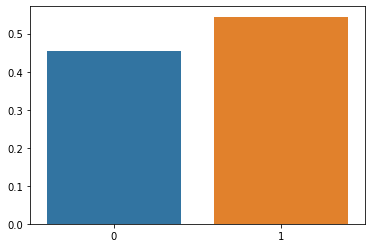

In [90]:
saida = dados_tratados['output'].value_counts(normalize=True)
print(saida)
sns.barplot(x=saida.keys(),y=saida.values)

Observamos que originalmente a classe de "alta probabilidade de ataque cardiaco"('11) é 54,46% do conjunto e a classe de "Baixa probabilidade de ataque cardíaco"('0') possui 45,54% das amostras. Portanto os dados são desbalanceados.
Fizemos essa observação para posteriormente podermos analizar as amostragens em relação a balancemento.

### Faremos agora a amostragem aleatória simples de 30% sem reposição.

In [91]:
amostra_30_sr = dados_tratados.sample(frac=0.3, replace=False) #amostra de 30% sem reposição


In [92]:
amostra_30_sr.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
144,76,0,140,197,0,116,0,1.1,1,0,2,1,0,0,1,1,0,0,0
230,47,1,108,243,0,152,0,0.0,2,0,2,0,0,1,0,1,0,0,0
110,64,0,180,325,0,154,1,0.0,2,0,2,1,0,1,0,0,0,1,0
274,47,1,110,275,0,118,1,1.0,1,1,2,0,1,0,0,0,0,1,0
254,59,1,160,273,0,125,0,0.0,2,0,2,0,1,0,0,0,0,0,1


In [93]:
amostra_30_sr.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,55.362637,0.670330,132.978022,245.373626,0.175824,147.318681,0.285714,1.006593,1.362637,0.648352,2.351648,0.549451,0.516484,0.461538,0.021978,0.329670,0.153846,0.417582,0.098901
std,9.132988,0.472698,21.341654,48.205267,0.382780,23.581951,0.454257,1.045286,0.641465,0.923443,0.603207,0.500305,0.502497,0.501280,0.147424,0.472698,0.362800,0.495893,0.300183
min,35.000000,0.000000,100.000000,131.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,120.000000,210.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,243.000000,0.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62.000000,1.000000,146.500000,277.000000,0.000000,164.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,76.000000,1.000000,200.000000,360.000000,1.000000,195.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1    0.549451
0    0.450549
Name: output, dtype: float64


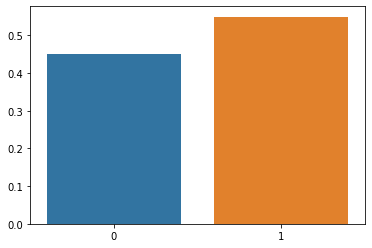

In [94]:
Saida_amostra_30_sr = amostra_30_sr.output.value_counts(normalize=True)
print(Saida_amostra_30_sr)
sns.barplot(x=Saida_amostra_30_sr.keys(),y=Saida_amostra_30_sr.values)

A cada vez que executamos os últimos três trechos de código o resultado foi diferente, devido o caráter aleatório da amostragem.

In [95]:
Teste_amostra_30_sr = amostra_30_sr.drop_duplicates()#salientando que não há o inplace = "True" para não alterar o registro original
Teste_amostra_30_sr.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,55.362637,0.670330,132.978022,245.373626,0.175824,147.318681,0.285714,1.006593,1.362637,0.648352,2.351648,0.549451,0.516484,0.461538,0.021978,0.329670,0.153846,0.417582,0.098901
std,9.132988,0.472698,21.341654,48.205267,0.382780,23.581951,0.454257,1.045286,0.641465,0.923443,0.603207,0.500305,0.502497,0.501280,0.147424,0.472698,0.362800,0.495893,0.300183
min,35.000000,0.000000,100.000000,131.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,120.000000,210.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,243.000000,0.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62.000000,1.000000,146.500000,277.000000,0.000000,164.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,76.000000,1.000000,200.000000,360.000000,1.000000,195.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Como podemos observar, ao eliminar registros duplicados o dataset permanece o mesmo. Esse teste foi realizado somente para visualizar a existência de registros repetidos, que não seriam permitidos para essa amostragem. 

## 2. Amostragem simples de 30% com reposição.

In [96]:
amostra_30_cr = dados_tratados.sample(frac=0.3, replace=True) #amostra de 30% com reposição

In [97]:
amostra_30_cr.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
286,59,1,134,204,0,162,0,0.8,2,2,2,0,0,1,0,0,0,0,1
94,45,0,112,160,0,138,0,0.0,1,0,2,1,0,1,0,0,1,0,0
122,41,0,112,268,0,172,1,0.0,2,0,2,1,1,0,0,1,0,0,0
161,55,0,132,342,0,166,0,1.2,2,0,2,1,0,1,0,0,1,0,0
120,64,0,130,303,0,122,0,2.0,1,2,2,1,0,1,0,0,0,1,0


In [98]:
amostra_30_cr.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,54.758242,0.648352,133.000000,247.461538,0.197802,148.912088,0.307692,1.021978,1.428571,0.604396,2.230769,0.571429,0.494505,0.494505,0.010989,0.285714,0.164835,0.439560,0.109890
std,8.924798,0.480130,18.438486,56.194762,0.400549,23.163500,0.464095,1.212601,0.617213,0.905282,0.616025,0.497613,0.502740,0.502740,0.104828,0.454257,0.373087,0.499083,0.314485
min,29.000000,0.000000,100.000000,126.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,0.000000,120.000000,204.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,236.000000,0.000000,154.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62.000000,1.000000,140.000000,282.000000,0.000000,163.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,71.000000,1.000000,180.000000,417.000000,1.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1    0.571429
0    0.428571
Name: output, dtype: float64


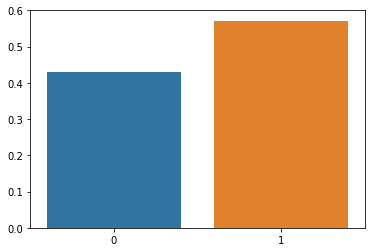

In [99]:
saida_amostra_30_cr = amostra_30_cr.output.value_counts(normalize=True)
print(saida_amostra_30_cr)
sns.barplot(x=saida_amostra_30_cr.keys(),y=saida_amostra_30_cr.values)

In [100]:
teste_amostra_30_cr = amostra_30_cr.drop_duplicates()#salientando que não há o inplace = "True" para não alterar o registro original
teste_amostra_30_cr.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,54.121951,0.658537,133.231707,245.085366,0.207317,149.195122,0.317073,1.030488,1.414634,0.609756,2.231707,0.560976,0.487805,0.500000,0.012195,0.292683,0.158537,0.451220,0.097561
std,9.034078,0.477119,18.211581,55.487114,0.407879,23.579882,0.468200,1.228136,0.607590,0.912953,0.634381,0.499322,0.502927,0.503077,0.110432,0.457794,0.367491,0.500677,0.298546
min,29.000000,0.000000,100.000000,126.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,120.000000,203.250000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.500000,1.000000,130.000000,235.500000,0.000000,155.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62.000000,1.000000,140.000000,281.750000,0.000000,164.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,71.000000,1.000000,180.000000,417.000000,1.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Como esperado, ao utilizar a função para eliminar registros duplicados nós comprovamos que a amostra possuia registros repetidos devido à reposição.

## 3. Amostragem simples de 50% sem reposição.

In [101]:
amostra_50_sr = dados_tratados.sample(frac = 0.5 , replace = False) #amostra simples aleatória de 50% sem reposição 

In [102]:
amostra_50_sr.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
302,57,0,130,236,0,174,0,0.0,1,1,2,0,1,0,0,0,1,0,0
161,55,0,132,342,0,166,0,1.2,2,0,2,1,0,1,0,0,1,0,0
206,59,1,110,239,0,142,1,1.2,1,1,3,0,1,0,0,0,0,1,0
286,59,1,134,204,0,162,0,0.8,2,2,2,0,0,1,0,0,0,0,1
231,57,1,165,289,1,124,0,1.0,1,3,3,0,1,0,0,0,0,1,0


In [103]:
amostra_50_sr.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,54.927632,0.677632,133.151316,248.493421,0.157895,150.059211,0.348684,1.038158,1.421053,0.750000,2.276316,0.532895,0.493421,0.493421,0.013158,0.256579,0.190789,0.467105,0.085526
std,9.094138,0.468928,18.510337,55.179178,0.365848,22.199348,0.478129,1.119421,0.592741,1.018049,0.663099,0.500566,0.501609,0.501609,0.114327,0.438189,0.394222,0.500566,0.280588
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.750000,0.000000,120.000000,211.750000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,239.000000,0.000000,154.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,144.250000,276.250000,0.000000,165.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,77.000000,1.000000,180.000000,564.000000,1.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1    0.532895
0    0.467105
Name: output, dtype: float64


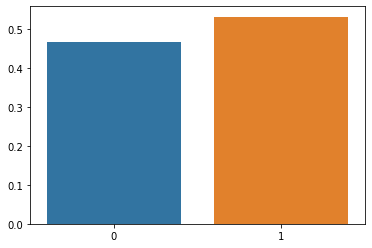

In [104]:
saida_amostra_50_sr = amostra_50_sr.output.value_counts(normalize=True)
print(saida_amostra_50_sr)
sns.barplot(x=saida_amostra_50_sr.keys(),y=saida_amostra_50_sr.values)

In [105]:
teste_amostra_50_sr = amostra_50_sr.drop_duplicates()#salientando que não há o inplace = "True" para não alterar o registro original
teste_amostra_50_sr.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,54.927632,0.677632,133.151316,248.493421,0.157895,150.059211,0.348684,1.038158,1.421053,0.750000,2.276316,0.532895,0.493421,0.493421,0.013158,0.256579,0.190789,0.467105,0.085526
std,9.094138,0.468928,18.510337,55.179178,0.365848,22.199348,0.478129,1.119421,0.592741,1.018049,0.663099,0.500566,0.501609,0.501609,0.114327,0.438189,0.394222,0.500566,0.280588
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.750000,0.000000,120.000000,211.750000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,239.000000,0.000000,154.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,144.250000,276.250000,0.000000,165.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,77.000000,1.000000,180.000000,564.000000,1.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Amostragem simples de 50% com reposição.

In [106]:
amostra_50_cr = dados_tratados.sample(frac=0.5,replace=True)

In [107]:
amostra_50_cr.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
117,56,1,120,193,0,162,0,1.9,1,0,3,1,1,0,0,0,0,0,1
49,53,0,138,234,0,160,0,0.0,2,0,2,1,1,0,0,0,0,1,0
213,61,0,145,307,0,146,1,1.0,1,0,3,0,1,0,0,0,0,1,0
142,42,0,120,209,0,173,0,0.0,1,0,2,1,0,1,0,1,0,0,0
77,59,1,140,221,0,164,1,0.0,2,0,2,1,0,1,0,0,1,0,0


In [108]:
amostra_50_cr.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,54.394737,0.651316,130.855263,244.407895,0.171053,150.763158,0.381579,1.109868,1.440789,0.907895,2.421053,0.506579,0.500000,0.493421,0.006579,0.315789,0.085526,0.552632,0.046053
std,8.832629,0.478129,16.206208,48.239243,0.377800,21.120197,0.487380,1.111098,0.606079,1.147155,0.546225,0.501609,0.501653,0.501609,0.081111,0.466366,0.280588,0.498866,0.210292
min,34.000000,0.000000,94.000000,149.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.500000,0.000000,120.000000,210.750000,0.000000,139.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,132.000000,239.000000,0.000000,152.500000,0.000000,0.950000,1.500000,0.000000,2.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,60.250000,1.000000,140.000000,269.000000,0.000000,168.000000,1.000000,1.900000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,77.000000,1.000000,200.000000,409.000000,1.000000,194.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1    0.506579
0    0.493421
Name: output, dtype: float64


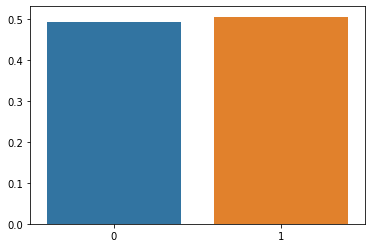

In [109]:
saida_amostra_50_cr = amostra_50_cr.output.value_counts(normalize=True)
print(saida_amostra_50_cr)
sns.barplot(x=saida_amostra_50_cr.keys(),y=saida_amostra_50_cr.values)

In [110]:
teste_amostra_50_cr = amostra_50_cr.drop_duplicates()
teste_amostra_50_cr.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,54.144068,0.644068,131.237288,241.000000,0.152542,150.745763,0.338983,1.049153,1.457627,0.779661,2.364407,0.542373,0.466102,0.525424,0.008475,0.322034,0.110169,0.516949,0.050847
std,9.026339,0.480837,16.602789,48.275562,0.361079,22.338953,0.475383,1.096439,0.608263,1.071269,0.549518,0.500326,0.500977,0.501483,0.092057,0.469248,0.314436,0.501844,0.220623
min,34.000000,0.000000,94.000000,149.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,207.250000,0.000000,138.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,131.000000,234.500000,0.000000,157.000000,0.000000,0.850000,2.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,1.000000,140.000000,268.750000,0.000000,167.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,77.000000,1.000000,200.000000,409.000000,1.000000,194.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5. Amostragem estratificada de 50%.

Para amostras estratificadas utilizaremos a função de amostragem do scikit learn geralmente utilizada para dividir o dataset em treino e teste na construção de um modelo de aprendizado de máquina. a função train_teste_split possui uma flag 'stratify' que permite a amostragem estratificada.

In [111]:
import sklearn
from sklearn.model_selection import train_test_split
dados_treino = dados_tratados.drop(columns='output',axis=1)
x_train , x_test , y_train , y_teste = train_test_split(dados_treino,dados_tratados.output,stratify=dados_tratados.output,test_size=0.5)

In [112]:
amostra_50_estratificada = x_train
amostra_50_estratificada['output'] = y_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [113]:
amostra_50_estratificada.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina,output
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,54.894040,0.688742,133.052980,249.754967,0.152318,150.132450,0.331126,1.116556,1.384106,0.715232,2.264901,0.529801,0.463576,0.006623,0.298013,0.119205,0.496689,0.086093,0.543046
std,8.882306,0.464549,18.960235,54.421070,0.360525,21.453104,0.472184,1.185211,0.630988,0.975551,0.618622,0.500772,0.500331,0.081379,0.458907,0.325108,0.501653,0.281434,0.499801
min,35.000000,0.000000,100.000000,141.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,212.000000,0.000000,137.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,245.000000,0.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,61.000000,1.000000,140.000000,275.500000,0.000000,166.500000,1.000000,1.900000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,74.000000,1.000000,200.000000,564.000000,1.000000,195.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1    0.543046
0    0.456954
Name: output, dtype: float64


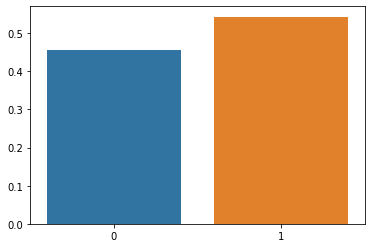

In [114]:
teste_amostra_50_estratificada = amostra_50_estratificada.output.value_counts(normalize=True)
print(teste_amostra_50_estratificada)
sns.barplot(x=teste_amostra_50_estratificada.keys(),y=teste_amostra_50_estratificada.values)

In [115]:
print(dados_tratados.output.value_counts(normalize=True))

1    0.544554
0    0.455446
Name: output, dtype: float64


## Para mostrar a amostra estratificada plotamos um gráfico de barras da amostra original logo em seguida da amostra estratificada para mostrar como as proporções se mantiveram muito próximas após a amostragem. a amostra estratificada obteve proporção:
 
 1 -> 0.5430;(inicial = 0.5446) 
 
 0->0.4570;(inicial = 0.4554)

## 6. Amostragem simples de 70% sem reposição

In [116]:
amostra_70_sr = dados_tratados.sample(frac = 0.7 , replace = False) #amostra simples aleatória de 70% sem reposição 

In [117]:
amostra_70_sr.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
165,67,1,160,286,0,108,1,1.5,1,3,2,0,1,0,0,0,0,1,0
27,51,1,110,175,0,123,0,0.6,2,0,2,1,0,1,0,1,0,0,0
187,54,1,124,266,0,109,1,2.2,1,1,3,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,2,1,1,0,0,0,1,0,0
148,44,1,120,226,0,169,0,0.0,2,0,2,1,0,1,0,1,0,0,0


In [118]:
amostra_70_sr.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.844340,0.674528,131.330189,251.424528,0.141509,150.731132,0.320755,1.009906,1.448113,0.702830,2.339623,0.528302,0.485849,0.500000,0.014151,0.273585,0.165094,0.485849,0.075472
std,9.002333,0.469660,17.695005,54.557843,0.349371,21.863609,0.467871,1.112721,0.601850,0.969385,0.557360,0.500380,0.500983,0.501183,0.118393,0.446854,0.372144,0.500983,0.264776
min,34.000000,0.000000,94.000000,131.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.750000,0.000000,120.000000,212.750000,0.000000,137.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,244.000000,0.000000,154.000000,0.000000,0.750000,2.000000,0.000000,2.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,282.250000,0.000000,166.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,77.000000,1.000000,192.000000,564.000000,1.000000,195.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1    0.528302
0    0.471698
Name: output, dtype: float64


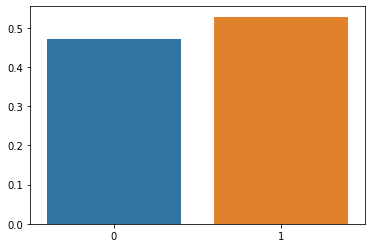

In [119]:
teste_amostra_70_sr = amostra_70_sr.output.value_counts(normalize=True)
print(teste_amostra_70_sr)
sns.barplot(x=teste_amostra_70_sr.keys(),y=teste_amostra_70_sr.values)

In [120]:
teste_Duplicata_70_sr = amostra_70_sr.drop_duplicates()
teste_Duplicata_70_sr.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.844340,0.674528,131.330189,251.424528,0.141509,150.731132,0.320755,1.009906,1.448113,0.702830,2.339623,0.528302,0.485849,0.500000,0.014151,0.273585,0.165094,0.485849,0.075472
std,9.002333,0.469660,17.695005,54.557843,0.349371,21.863609,0.467871,1.112721,0.601850,0.969385,0.557360,0.500380,0.500983,0.501183,0.118393,0.446854,0.372144,0.500983,0.264776
min,34.000000,0.000000,94.000000,131.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.750000,0.000000,120.000000,212.750000,0.000000,137.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,244.000000,0.000000,154.000000,0.000000,0.750000,2.000000,0.000000,2.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,282.250000,0.000000,166.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,77.000000,1.000000,192.000000,564.000000,1.000000,195.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 7. Amostragem simples de 70% com reposição.

In [121]:
amostra_70_cr = dados_tratados.sample(frac=0.7,replace = True)

In [122]:
amostra_70_cr.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
106,69,1,160,234,1,131,0,0.1,1,1,2,1,1,0,0,0,0,0,1
234,70,1,130,322,0,109,0,2.4,1,3,2,0,1,0,0,0,0,1,0
234,70,1,130,322,0,109,0,2.4,1,3,2,0,1,0,0,0,0,1,0
251,43,1,132,247,1,143,1,0.1,1,4,3,0,1,0,0,0,0,1,0
211,61,1,120,260,0,140,1,3.6,1,1,3,0,0,1,0,0,0,1,0


In [123]:
amostra_70_cr.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.254717,0.698113,133.089623,243.533019,0.127358,147.966981,0.325472,0.989623,1.443396,0.768868,2.316038,0.575472,0.471698,0.509434,0.018868,0.264151,0.141509,0.509434,0.084906
std,9.323630,0.460163,17.035688,53.865145,0.334163,24.122787,0.469660,1.125990,0.585451,1.122106,0.622735,0.495441,0.500380,0.501094,0.136381,0.441924,0.349371,0.501094,0.279401
min,34.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,120.000000,208.500000,0.000000,130.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,234.500000,0.000000,148.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,140.000000,282.000000,0.000000,168.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,76.000000,1.000000,192.000000,564.000000,1.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1    0.575472
0    0.424528
Name: output, dtype: float64


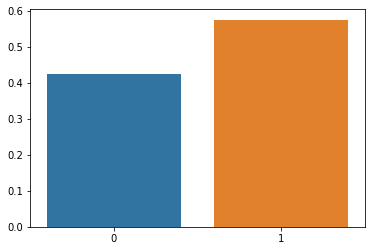

In [124]:
teste_amostra_70_cr = amostra_70_cr.output.value_counts(normalize=True)
print(teste_amostra_70_cr)
sns.barplot(x=teste_amostra_70_cr.keys(),y=teste_amostra_70_cr.values)

In [125]:
teste_Duplicata_70_cr = amostra_70_cr.drop_duplicates()
teste_Duplicata_70_cr.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,output,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,54.253247,0.701299,133.753247,248.889610,0.136364,147.974026,0.324675,1.011039,1.435065,0.753247,2.344156,0.551948,0.480519,0.500000,0.019481,0.279221,0.142857,0.493506,0.084416
std,9.388883,0.459182,17.729747,55.406703,0.344294,24.405332,0.469781,1.146781,0.604183,1.110330,0.619718,0.498917,0.501250,0.501631,0.138657,0.450080,0.351069,0.501589,0.278917
min,34.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,120.000000,211.250000,0.000000,130.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,242.500000,0.000000,149.500000,0.000000,0.650000,1.000000,0.000000,2.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,141.500000,283.000000,0.000000,168.000000,1.000000,1.750000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,76.000000,1.000000,192.000000,564.000000,1.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 8. Amostragem estratificada de 70%.

In [126]:
dados_treino70 = dados_tratados.drop(columns=['output'],axis=1)
X_70Treino, X_70Teste , Y_70Treino, Y_70Teste = train_test_split(dados_treino70,dados_tratados.output,stratify=dados_tratados.output,test_size=0.3)

In [127]:
amostra_70_estratificada = X_70Treino
amostra_70_estratificada['output'] = Y_70Treino

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [128]:
amostra_70_estratificada.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina,output
86,68,1,118,277,0,151,0,1.0,2,1,3,0,1,0,1,0,0,0,1
193,60,1,145,282,0,142,1,2.8,1,2,3,1,0,0,0,0,1,0,0
153,66,0,146,278,0,152,0,0.0,1,1,2,1,0,0,1,0,0,0,1
122,41,0,112,268,0,172,1,0.0,2,0,2,1,0,0,1,0,0,0,1
120,64,0,130,303,0,122,0,2.0,1,2,2,0,1,0,0,0,1,0,1


In [129]:
amostra_70_estratificada.describe()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,restecg__Normal,restecg__Possui_anormalidade,restecg__Provável_hipertrofia,cp__Angina_atipica,cp__Angina_tipica,cp__Assintomatico,cp__Não_Angina,output
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,53.943396,0.688679,130.589623,244.122642,0.141509,148.632075,0.334906,1.030189,1.377358,0.754717,2.316038,0.457547,0.528302,0.014151,0.297170,0.155660,0.476415,0.070755,0.542453
std,8.874940,0.464130,17.176985,48.947540,0.349371,23.698071,0.473075,1.159684,0.615023,1.055891,0.615077,0.499374,0.500380,0.118393,0.458094,0.363391,0.500626,0.257022,0.499374
min,34.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,210.750000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.500000,1.000000,130.000000,240.000000,0.000000,152.000000,0.000000,0.650000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,60.000000,1.000000,140.000000,276.250000,0.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,76.000000,1.000000,200.000000,409.000000,1.000000,194.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1    0.542453
0    0.457547
Name: output, dtype: float64


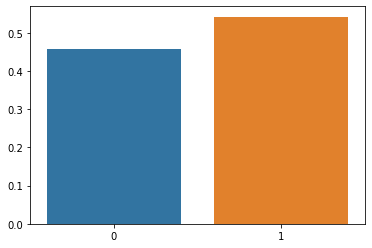

In [130]:
teste_amostra_70_estratificada = amostra_70_estratificada.output.value_counts(normalize=True)
print(teste_amostra_70_estratificada)
sns.barplot(x=teste_amostra_70_estratificada.keys(),y=teste_amostra_70_estratificada.values)

## Comparação entre as amostras geradas
--- 

In [131]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Amostragem de 30 sem reposição')

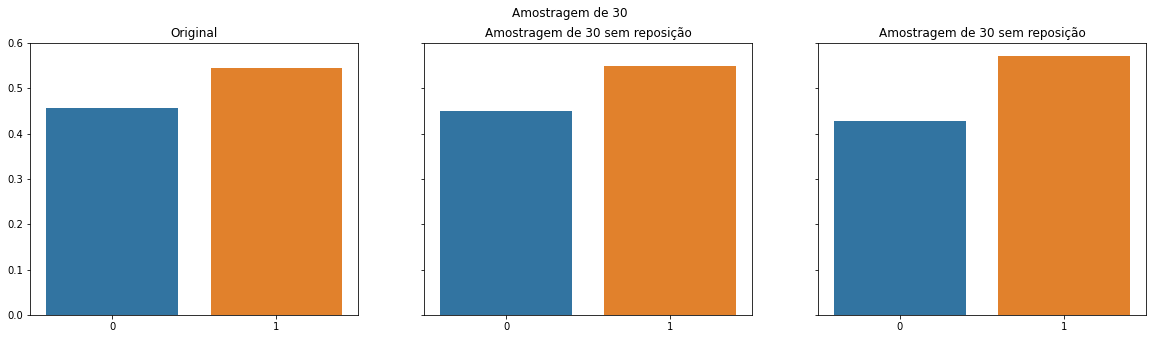

In [167]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('Amostragem de 30')

contagem_original = dados_tratados.output.value_counts(normalize=True)
sns.barplot(ax=axes[0],x=contagem_original.keys(),y=contagem_original.values)
axes[0].set_title("Original")

contagem_30_sr = amostra_30_sr.output.value_counts(normalize=True)
sns.barplot(ax=axes[1],x=contagem_30_sr.keys(),y=contagem_30_sr.values)
axes[1].set_title("Amostragem de 30 sem reposição")


contagem_30_cr = amostra_30_cr.output.value_counts(normalize=True)
sns.barplot(ax=axes[2],x=contagem_30_cr.keys(),y=contagem_30_cr.values)
axes[2].set_title("Amostragem de 30 sem reposição")

Text(0.5, 1.0, 'Amostragem de 50 estratificada')

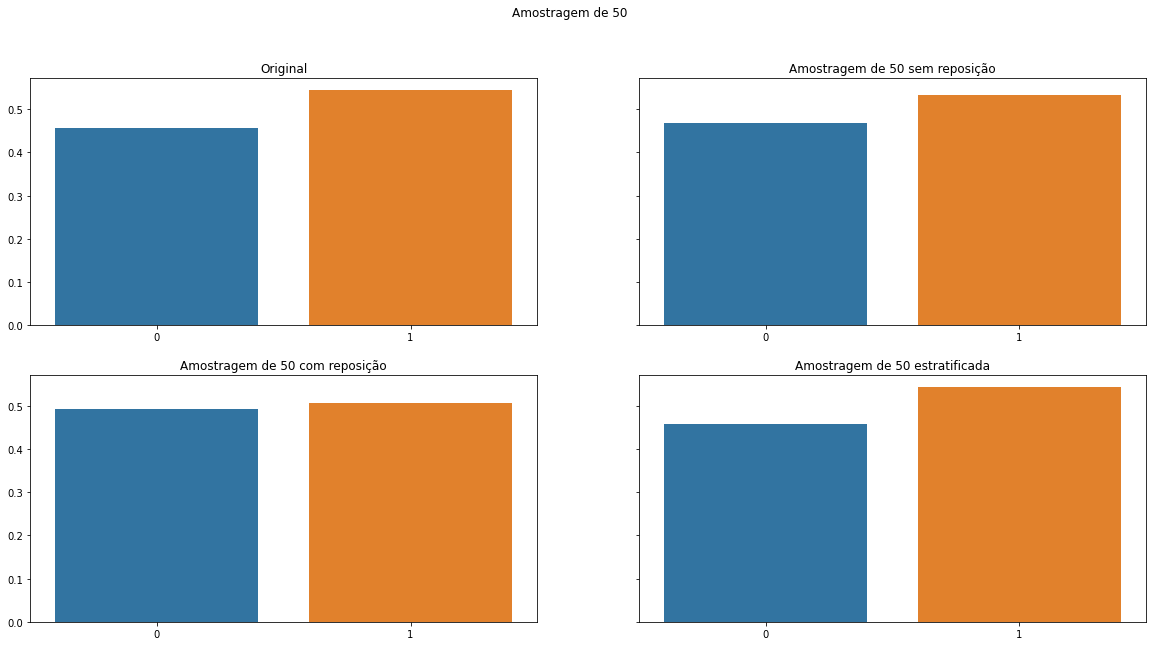

In [170]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharey=True)
fig.suptitle('Amostragem de 50')

contagem_original = dados_tratados.output.value_counts(normalize=True)
sns.barplot(ax=axes[0,0],x=contagem_original.keys(),y=contagem_original.values)
axes[0,0].set_title("Original")

contagem_50_sr = amostra_50_sr.output.value_counts(normalize=True)
sns.barplot(ax=axes[0,1],x=contagem_50_sr.keys(),y=contagem_50_sr.values)
axes[0,1].set_title("Amostragem de 50 sem reposição")


contagem_50_cr = amostra_50_cr.output.value_counts(normalize=True)
sns.barplot(ax=axes[1,0],x=contagem_50_cr.keys(),y=contagem_50_cr.values)
axes[1,0].set_title("Amostragem de 50 com reposição")

contagem_50_estratificada = amostra_50_estratificada.output.value_counts(normalize=True)
sns.barplot(ax=axes[1,1],x=contagem_50_estratificada.keys(),y=contagem_50_estratificada.values)
axes[1,1].set_title("Amostragem de 50 estratificada")

Text(0.5, 1.0, 'Amostragem de 70 estratificada')

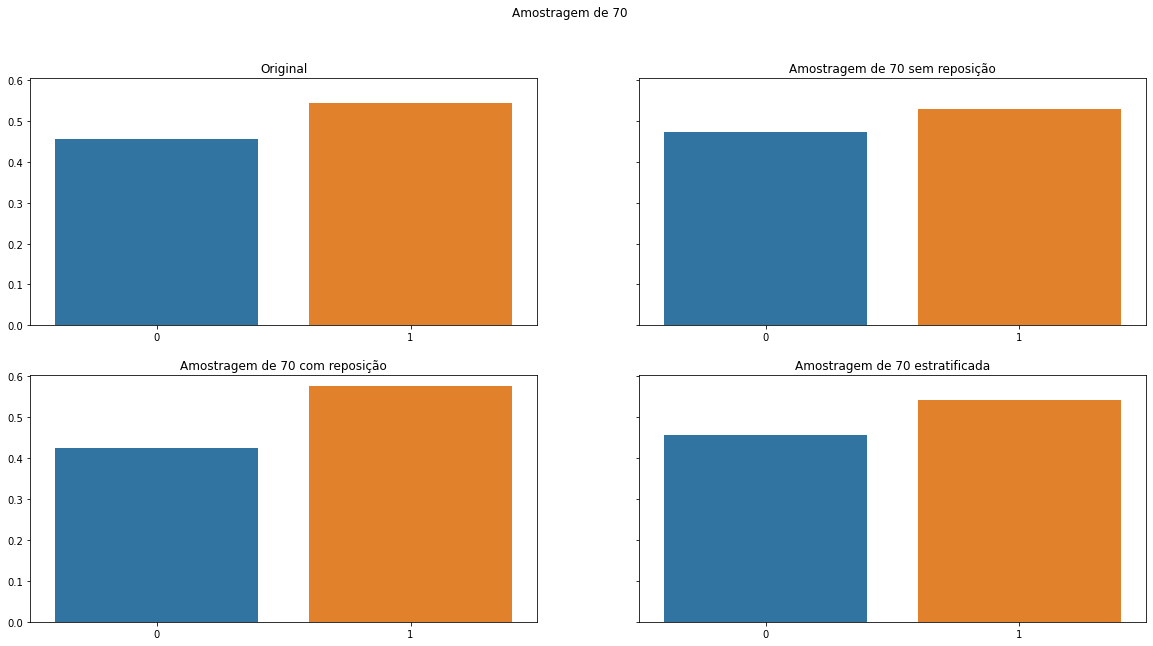

In [171]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharey=True)
fig.suptitle('Amostragem de 70')

contagem_original = dados_tratados.output.value_counts(normalize=True)
sns.barplot(ax=axes[0,0],x=contagem_original.keys(),y=contagem_original.values)
axes[0,0].set_title("Original")

contagem_70_sr = amostra_70_sr.output.value_counts(normalize=True)
sns.barplot(ax=axes[0,1],x=contagem_70_sr.keys(),y=contagem_70_sr.values)
axes[0,1].set_title("Amostragem de 70 sem reposição")


contagem_70_cr = amostra_70_cr.output.value_counts(normalize=True)
sns.barplot(ax=axes[1,0],x=contagem_70_cr.keys(),y=contagem_70_cr.values)
axes[1,0].set_title("Amostragem de 70 com reposição")

contagem_70_estratificada = amostra_70_estratificada.output.value_counts(normalize=True)
sns.barplot(ax=axes[1,1],x=contagem_70_estratificada.keys(),y=contagem_70_estratificada.values)
axes[1,1].set_title("Amostragem de 70 estratificada")